# Agenda
- Analyze the [Data science job posting on glassdoor](https://www.kaggle.com/rashikrahmanpritom/data-science-job-posting-on-glassdoor) dataset and answer the following possible questions that may arise :
	1. What is the mean salary estimates of different job roles (Data scientist, data engineers, ...)?
	2. What is the mean job ratings for each of the job role (Data scientist, data engineers, ...) ?
	3. What industries requires most Data scientists and Data engineers ?
	4. Is there a relationship between job ratings and salary estimates ?
	5. What are the top 5 cities and companies that are most active in hiring both Data scientists and Data engineers?
	6. What are the top skills required for both Data scientists and Data engineers ?

# Dataset description
- This dataset consists of one file : **DS_Job.csv**
- The dataset records the job postings related to data science and data engineering on Glassdoor. This dataset includes basic information like job title, salary estimates, job description, company size, ...

# Recommended reading
- Seaborn documentation : [Seaborn Doc](https://seaborn.pydata.org/tutorial/distributions.html)
- Scipy documentation : [Scipy Doc](https://www.scipy.org/docs.html)

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
plt.style.use('seaborn-darkgrid')

data = pd.read_csv('/content/drive/My Drive/DS_Jobs.csv')
data.head()

Mounted at /content/drive


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154,NY,1,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154,VA,0,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,MA,1,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154,MA,0,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154,NY,1,22,1,1,0,0,0,0,0,data scientist,na


## Question 1 : What is the mean salary estimates of different job roles (Data scientist, data engineers, ...)?

In [2]:
# 1. Get all unique job roles
data['job_simp'].unique()

array(['data scientist', 'na', 'analyst', 'data engineer', 'mle',
       'manager', 'director'], dtype=object)

In [3]:
# 2. Clean the job titles a bit
def clean_job_title(title):
  if('data scientist' in title.lower() or 'data science' in title.lower()):
    return "Data Scientist"
  if('data engineer' in title.lower()):
    return "Data Engineer"
  if("software engineer" in title.lower() or 'computer scientist' in title.lower() or 'computational scientist' in title.lower()):
    return "Software Engineer"
  if("data analyst" in title.lower()):
    return "Data Analyst"
  if('business intelligence' in title.lower()):
    return "Business Intelligence"
  if('machine learning' in title.lower()):
    return "Machine Learning Engineer"
  if('data modeler' in title.lower()):
    return "Data Modeler"
  if('scientist' in title.lower()):
    return 'Specialty Data Scientist'
  else: 
    return 'Others'

  return title

data['Job Title'] = data['Job Title'].apply(clean_job_title)
data['Job Title'].unique()

array(['Data Scientist', 'Data Modeler', 'Data Analyst',
       'Specialty Data Scientist', 'Business Intelligence',
       'Data Engineer', 'Machine Learning Engineer', 'Software Engineer',
       'Others'], dtype=object)

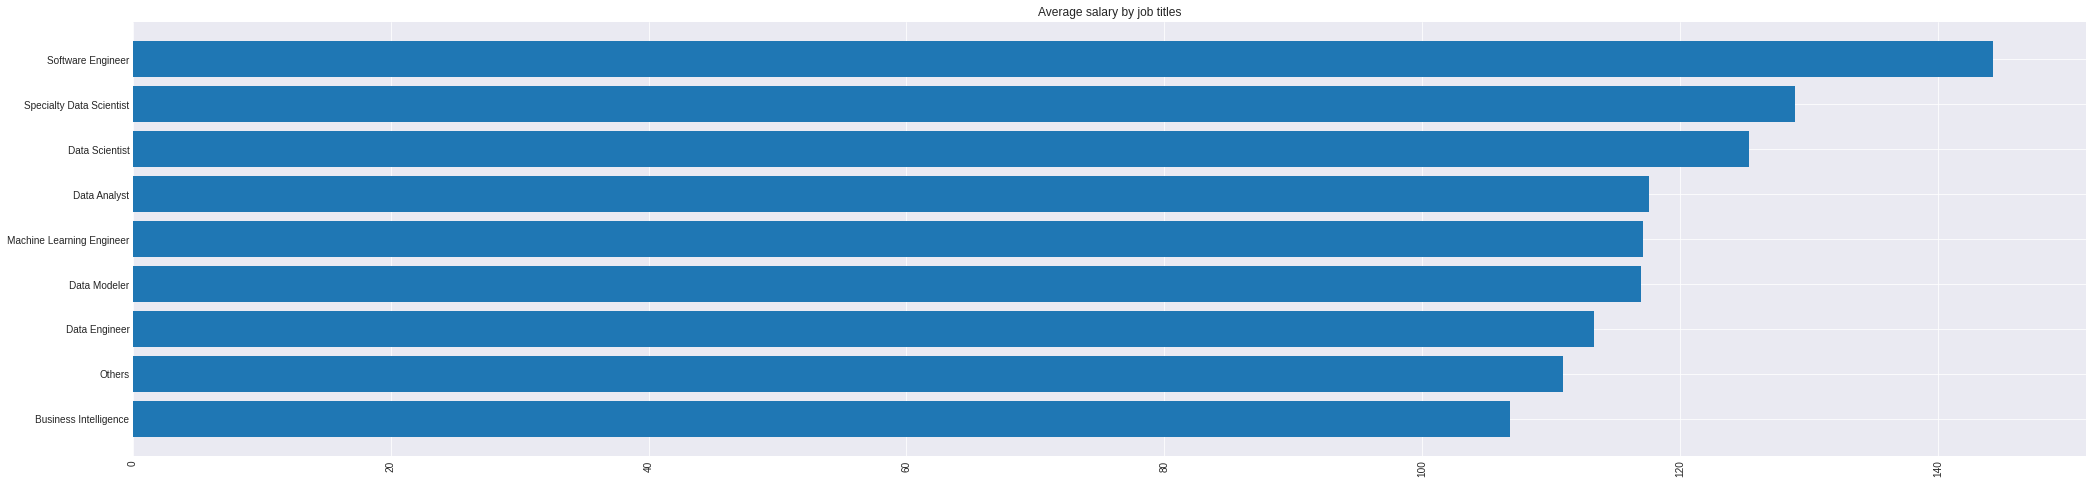

In [4]:
# 3. Mean salary of each job role
sal_by_job = data.groupby('Job Title').mean()['avg_salary']

# 4. Sort by the values
sal_by_job = sal_by_job.sort_values()

fig, ax = plt.subplots(figsize=(35, 8))
plt.barh(sal_by_job.index, sal_by_job.values)
plt.xticks(rotation=90)
plt.title("Average salary by job titles")
plt.show()

## Question 2 : What is the mean job ratings for each of the job role (Data scientist, data engineers, ...) ?

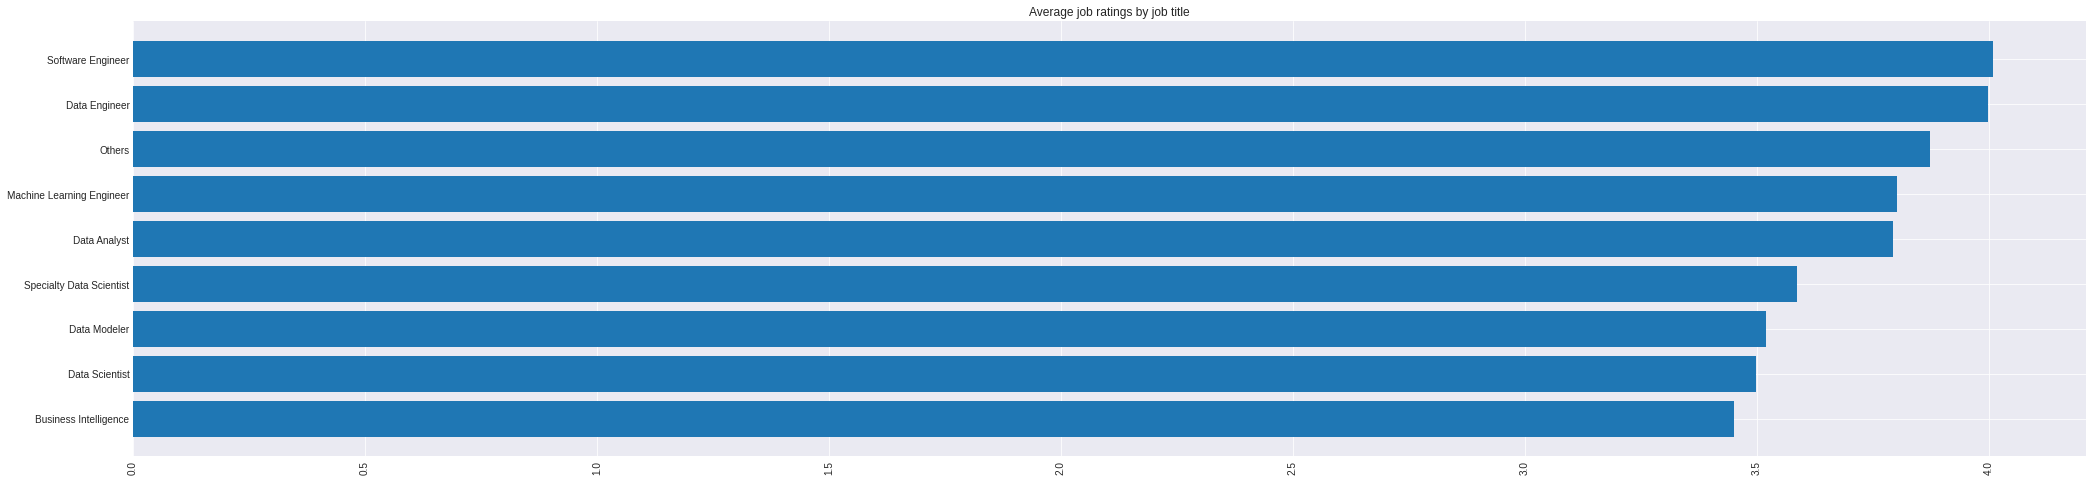

In [5]:
# 3. Mean ratings of each job role
sal_by_job = data.groupby('Job Title').mean()['Rating']

# 4. Sort by the values
sal_by_job = sal_by_job.sort_values()

fig, ax = plt.subplots(figsize=(35, 8))
plt.barh(sal_by_job.index, sal_by_job.values)
plt.xticks(rotation=90)
plt.title("Average job ratings by job title")
plt.show()

## Question 3 : What industries requires most Data scientists and Data engineers ?

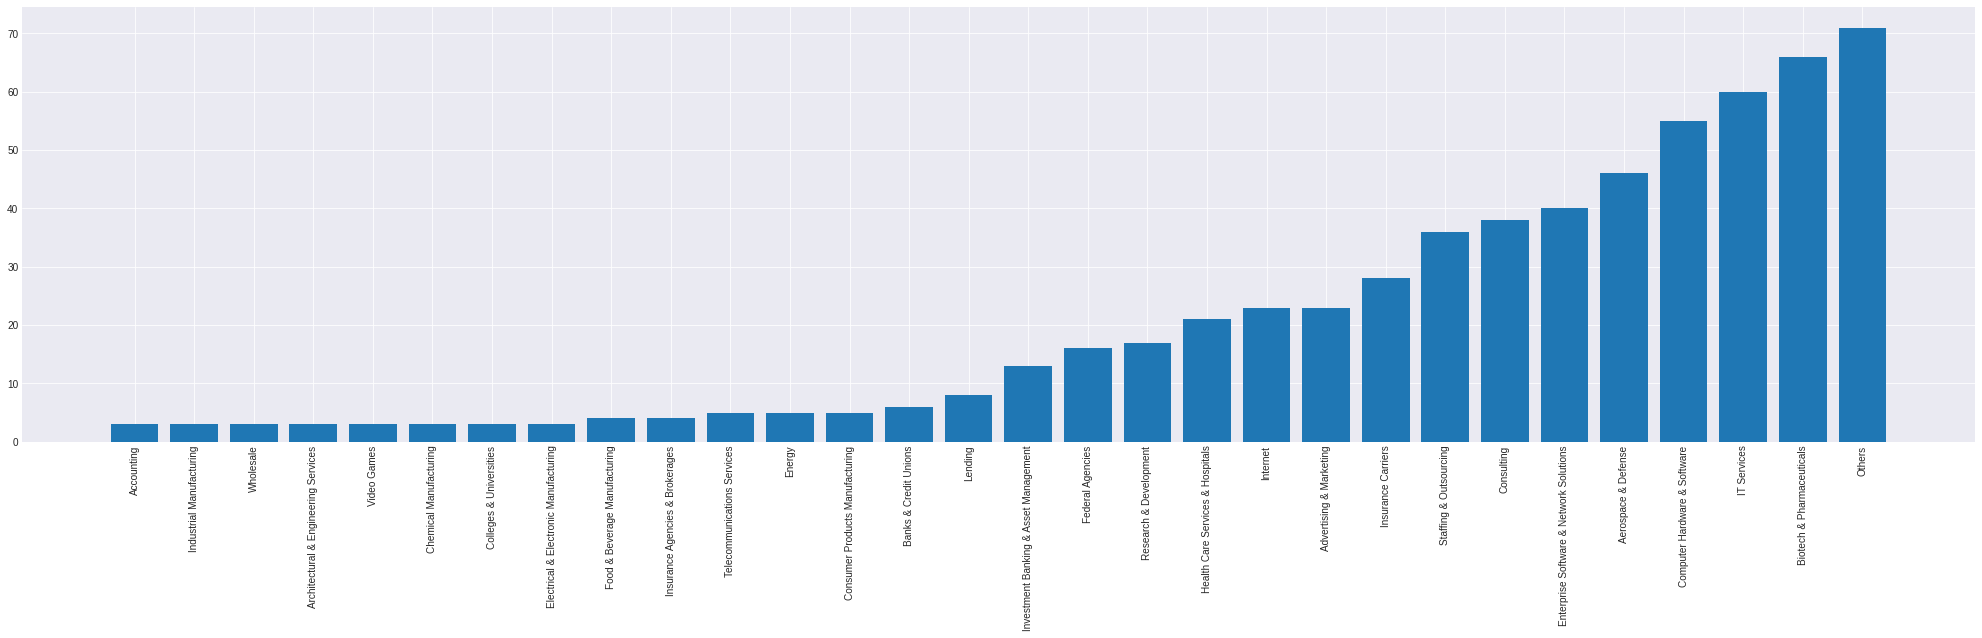

In [6]:
# 0. Clean the column "Industry" (-1 means "Others")
data['Industry'] = data['Industry'].apply(lambda x : 'Others' if x == '-1' else x)

# 1. Count job roles by industry 
count_by_industry = data.groupby("Industry").count()['Job Title']

# 2. Sort the count in ascending order
count_by_industry = count_by_industry.sort_values()

# 3. Get the top 20 industries
count_by_industry = count_by_industry.tail(30)

fig, ax = plt.subplots(figsize=(35, 8))
plt.bar(count_by_industry.index, count_by_industry.values)
plt.xticks(rotation=90)
plt.show()

## Question 4 : Is there a relationship between job ratings and salary estimates ?

Pearson correlation pvalue = 0.08270882296439996


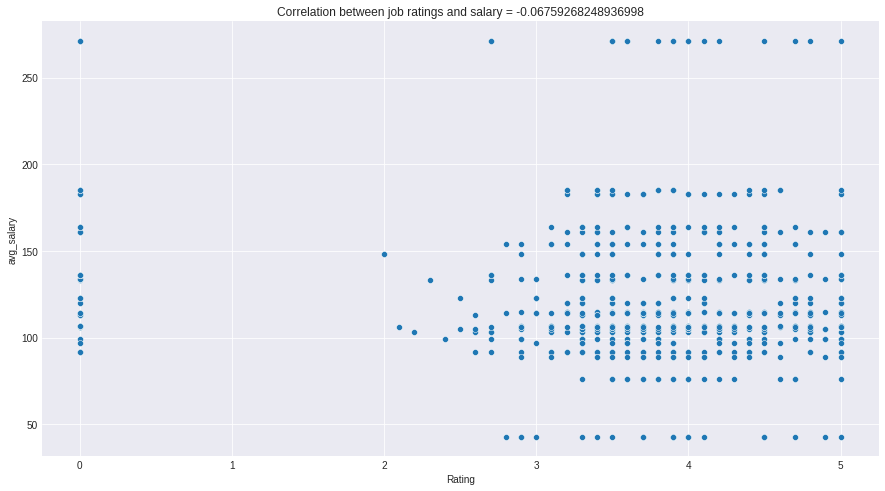

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=data, x='Rating', y='avg_salary', ax=ax)

r, pvalue = stats.pearsonr(data['Rating'], data['avg_salary'])
print(f'Pearson correlation pvalue = {pvalue}')

ax.set_title(f'Correlation between job ratings and salary = {r}')
plt.show()

## Question 5 : What are the top 5 cities and companies that are most active in hiring both Data scientists and Data engineers?

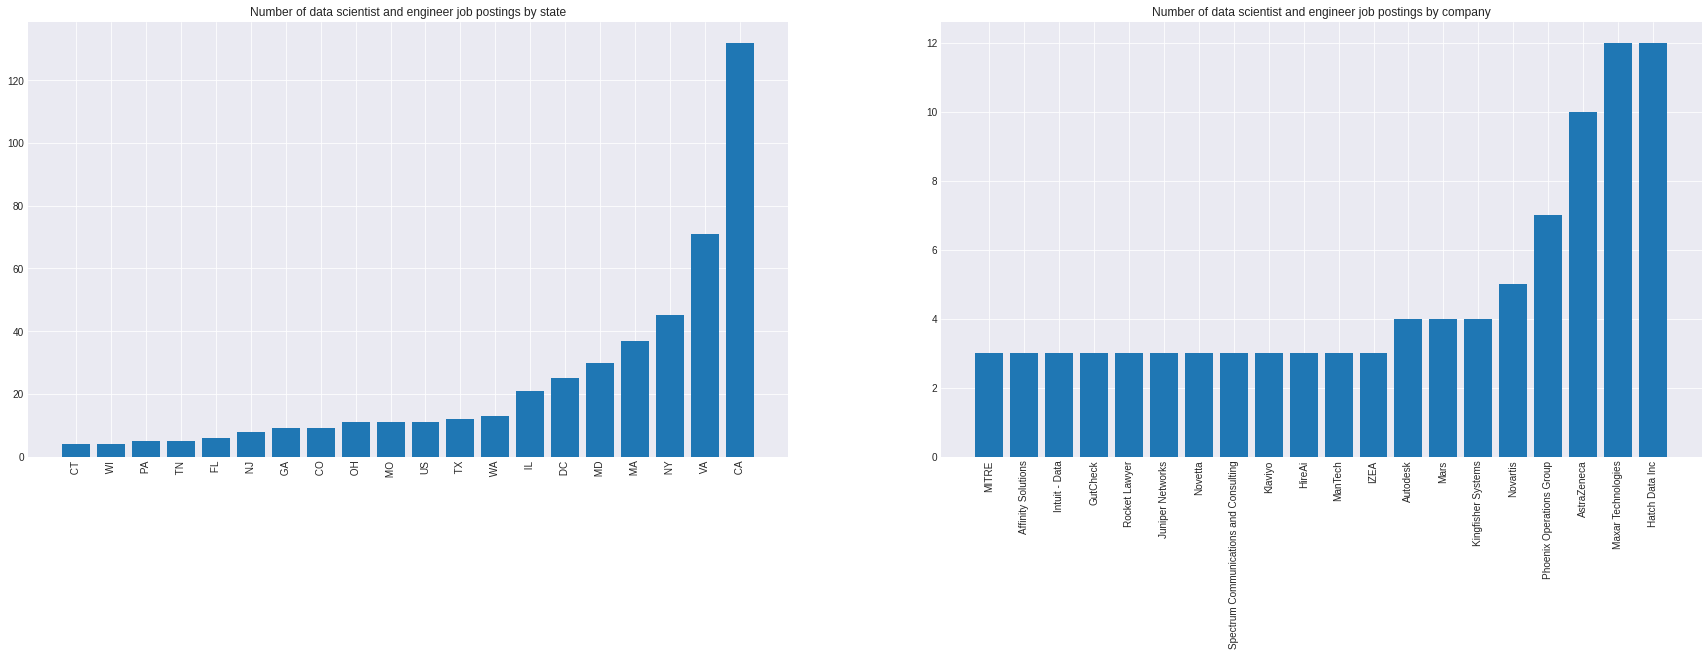

In [14]:
# First, filter the rows that has job titles data scientist and data engineer
data_sci = data[(data['job_simp'] == "data scientist") | (data['job_simp'] == "data engineer") ]

# Group the filtered data by state and company - take the top 20
count_by_state = data_sci.groupby("job_state").count()['job_simp'].sort_values().tail(20)
count_by_company = data_sci.groupby("Company Name").count()['job_simp'].sort_values().tail(20)

# Visualize the result
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
ax[0].bar(count_by_state.index, count_by_state.values)
ax[0].set_title("Number of data scientist and engineer job postings by state")

ax[1].bar(count_by_company.index, count_by_company.values)
ax[1].set_title("Number of data scientist and engineer job postings by company")

ax[0].set_xticklabels(count_by_state.index, rotation=90)
ax[1].set_xticklabels(count_by_company.index, rotation=90)

plt.show()

## Question 6 : What are the top skills required for data scientists and engineers

In [26]:
skills = ['python',	'excel',	'hadoop',	'spark',	'aws',	'tableau',	'big_data'	]

# Get the top skills required for each profession
skills_by_pos = data.groupby('job_simp').sum()[skills]
skills_by_pos

,python,excel,hadoop,spark,aws,tableau,big_data
job_simp,,,,,,,
analyst,28,30,3,5,2,27,3
data engineer,38,20,19,21,26,6,17
data scientist,358,193,109,142,119,82,106
director,1,1,0,0,1,0,0
manager,3,4,1,1,0,4,1
mle,26,6,3,5,14,0,3
na,28,37,5,12,10,3,6


In [27]:
# Get the skills for ds and de specifically
skills_by_pos.loc[['data engineer', 'data scientist'], :]

,python,excel,hadoop,spark,aws,tableau,big_data
job_simp,,,,,,,
data engineer,38,20,19,21,26,6,17
data scientist,358,193,109,142,119,82,106


In [28]:
# Above I showed the positions as the rows and the skills as the column
# You can transpose your dataframe so that skills appear as the rows and 
# positions appear as the column like this
skills_by_pos = skills_by_pos.loc[['data engineer', 'data scientist'], :].T # <- Add a dot capital T over here
skills_by_pos

job_simp,data engineer,data scientist
python,38,358
excel,20,193
hadoop,19,109
spark,21,142
aws,26,119
tableau,6,82
big_data,17,106


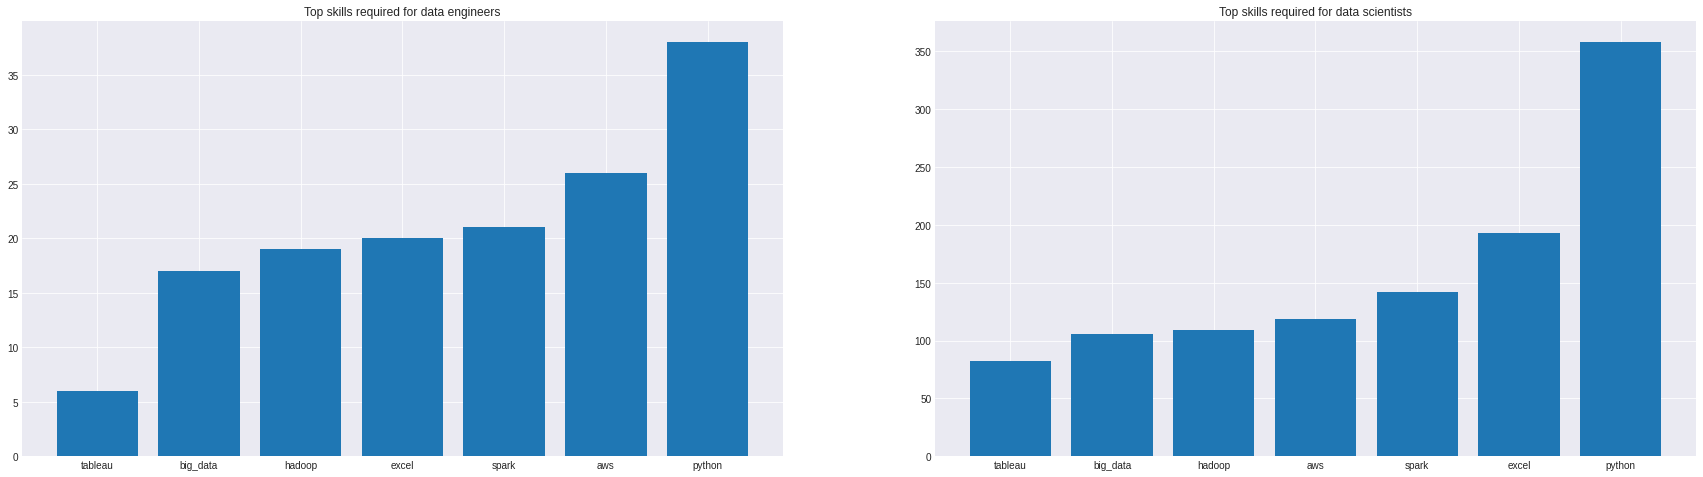

In [33]:
# Visualize the skills of these two professions
de_skills = skills_by_pos['data engineer'].sort_values()
ds_skills = skills_by_pos['data scientist'].sort_values()

fig, ax = plt.subplots(1, 2, figsize=(30, 8))
ax[0].bar(de_skills.index, de_skills.values)
ax[1].bar(ds_skills.index, ds_skills.values)

ax[0].set_title("Top skills required for data engineers")
ax[1].set_title("Top skills required for data scientists")
plt.show()